In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
# autoreload
%load_ext autoreload
%autoreload 2

### Set up and merge 2x csv files into a single dataframe.

In [4]:
df_vaccines = pd.read_csv('../data/COVID_VACCINATIONS.csv')
df_deaths = pd.read_csv('../data/COVID DEATHS.csv')

In [5]:
merged_df = pd.merge(df_deaths, df_vaccines, left_index=True, right_index=True)

In [6]:
# For ease of working with the data, I chose to drop several columns to focus my analysis.  Any changes to this dataframe can be conducted here.

columns_to_drop = ['iso_code_y', 'continent_y', 'location_y', 'date_y',
    'total_cases', 'new_cases', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'new_deaths_per_million',
    'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions',
    'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
    'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
    'positive_rate', 'tests_per_case', 'tests_units',
    'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index', 'handwashing_facilities',
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative']

main_df = merged_df.drop(columns = columns_to_drop).copy()

In [7]:
# To ensure this code works, .info() shows a snapshot of data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 35 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code_x                               302749 non-null  object 
 1   continent_x                              288347 non-null  object 
 2   location_x                               302749 non-null  object 
 3   date_x                                   302749 non-null  object 
 4   population                               302749 non-null  int64  
 5   new_cases_smoothed                       292800 non-null  float64
 6   total_deaths                             246214 non-null  float64
 7   new_deaths_smoothed                      292909 non-null  float64
 8   new_cases_smoothed_per_million           292800 non-null  float64
 9   total_deaths_per_million                 246214 non-null  float64
 10  new_deaths_smoothed_per_million 

In [8]:
# Isolate what countries you want to use in countries_of_interest:
countries_of_interest = ['Brazil', 'China', 'United States', 'Russia', 'India']
filtered_df = main_df[main_df['location_x'].isin(countries_of_interest)]

# Convert 'date' column to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date_x']) 

# Set 'date' as the DataFrame's index
filtered_df = filtered_df.set_index('date')  



C:\Users\trali\AppData\Local\Temp\ipykernel_5988\2269938580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date_x'])


### EDA and visualization of data begins here

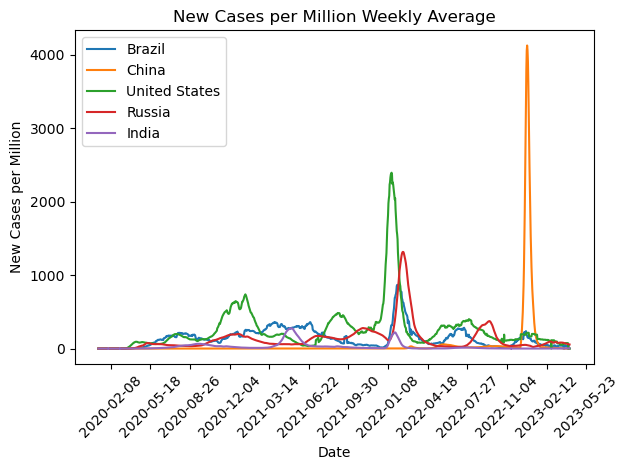

In [9]:
#Plot data for the entire dataset beginning 1/3/2020 extending to 4/12/2023.

# Define what column you want to plot:
column_to_plot = 'new_cases_smoothed_per_million'

# Iterate through countries
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot], label=country)

# Set plot title and labels
plt.title('New Cases per Million Weekly Average')
plt.xlabel('Date')
plt.ylabel('New Cases per Million')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

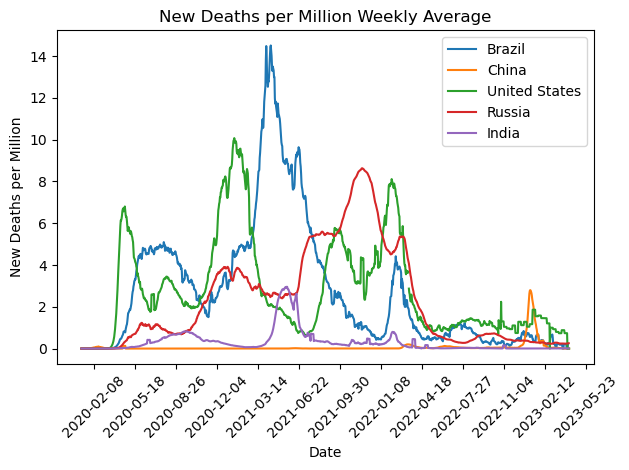

In [10]:
#Now do the same given these countries but focusing on the New Deaths Smoothed Column

#Setting up another variable here allows me to create a new visualization without breaking previous code
column_to_plot_a = 'new_deaths_smoothed_per_million'

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot_a], label=country)

# Set plot title and labels
plt.title('New Deaths per Million Weekly Average')
plt.xlabel('Date')
plt.ylabel('New Deaths per Million')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

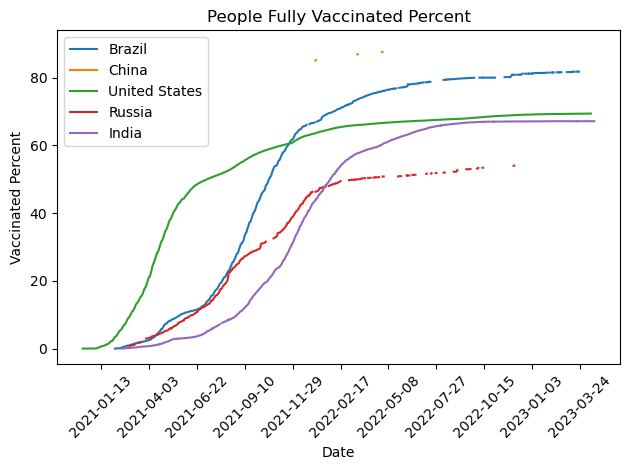

In [11]:
#Chart vaccination percentage

#Setting up another variable here allows me to create a new visualization without breaking previous code
column_to_plot_b = 'people_fully_vaccinated_per_hundred'

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot_b], label=country)

# Set plot title and labels
plt.title('People Fully Vaccinated Percent')
plt.xlabel('Date')
plt.ylabel('Vaccinated Percent')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Now looking at other methods of exploration.  This line of code just checks that there are only ever single scores given to the following variables:
# Necessary because if these variables change overtime they may not be good for comprehensive comparisons. 

# Get unique values for each specified column
unique_population_density = filtered_df['population_density'].unique()
unique_aged_65_older = filtered_df['aged_65_older'].unique()
unique_aged_70_older = filtered_df['aged_70_older'].unique()
unique_gdp_per_capita = filtered_df['gdp_per_capita'].unique()
unique_extreme_poverty = filtered_df['extreme_poverty'].unique()
unique_cardiovasc_death_rate = filtered_df['cardiovasc_death_rate'].unique()
unique_diabetes_prevalence = filtered_df['diabetes_prevalence'].unique()
unique_female_smokers = filtered_df['female_smokers'].unique()
unique_male_smokers = filtered_df['male_smokers'].unique()
unique_hospital_beds_per_thousand = filtered_df['hospital_beds_per_thousand'].unique()
unique_life_expectancy = filtered_df['life_expectancy'].unique()
unique_human_development_index = filtered_df['human_development_index'].unique()

# Print the unique values for each column
print("Unique Values for population_density:", unique_population_density)
print("Unique Values for aged_65_older:", unique_aged_65_older)
print("Unique Values for aged_70_older:", unique_aged_70_older)
print("Unique Values for gdp_per_capita:", unique_gdp_per_capita)
print("Unique Values for extreme_poverty:", unique_extreme_poverty)
print("Unique Values for cardiovasc_death_rate:", unique_cardiovasc_death_rate)
print("Unique Values for diabetes_prevalence:", unique_diabetes_prevalence)
print("Unique Values for female_smokers:", unique_female_smokers)
print("Unique Values for male_smokers:", unique_male_smokers)
print("Unique Values for hospital_beds_per_thousand:", unique_hospital_beds_per_thousand)
print("Unique Values for life_expectancy:", unique_life_expectancy)
print("Unique Values for human_development_index:", unique_human_development_index)


Unique Values for population_density: [ 25.04 147.67 450.42   8.82  35.61]
Unique Values for aged_65_older: [ 8.55 10.64  5.99 14.18 15.41]
Unique Values for aged_70_older: [5.06 5.93 3.41 9.39 9.73]
Unique Values for gdp_per_capita: [14103.45 15308.71  6426.67 24765.95 54225.45]
Unique Values for extreme_poverty: [ 3.4  0.7 21.2  0.1  1.2]
Unique Values for cardiovasc_death_rate: [177.96 261.9  282.28 431.3  151.09]
Unique Values for diabetes_prevalence: [ 8.11  9.74 10.39  6.18 10.79]
Unique Values for female_smokers: [10.1  1.9 23.4 19.1]
Unique Values for male_smokers: [17.9 48.4 20.6 58.3 24.6]
Unique Values for hospital_beds_per_thousand: [2.2  4.34 0.53 8.05 2.77]
Unique Values for life_expectancy: [75.88 76.91 69.66 72.58 78.86]
Unique Values for human_development_index: [0.77 0.76 0.65 0.82 0.93]


#### Construct a new data frame which has countries listed as the index and displays the desired values with the data taken only from rows in which the date == 4/12/2023

In [13]:
# Beginning with main_df to ensure that all countries are considered and not the filtered_df that was part of my initial EDA.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 35 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code_x                               302749 non-null  object 
 1   continent_x                              288347 non-null  object 
 2   location_x                               302749 non-null  object 
 3   date_x                                   302749 non-null  object 
 4   population                               302749 non-null  int64  
 5   new_cases_smoothed                       292800 non-null  float64
 6   total_deaths                             246214 non-null  float64
 7   new_deaths_smoothed                      292909 non-null  float64
 8   new_cases_smoothed_per_million           292800 non-null  float64
 9   total_deaths_per_million                 246214 non-null  float64
 10  new_deaths_smoothed_per_million 

In [14]:
# Creating new dataframe

# Specify what factors we want to consider for scatter plots and linear regression.
# Of note, that if a column is desired from the initial dataframe then they need to be removed from the columns_to_drop list above.
columns_to_capture = ['population', 'total_deaths', 'total_deaths_per_million', 'people_fully_vaccinated_per_hundred', 'total_vaccinations', 'population_density', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
                      'extreme_poverty', 'median_age', 'cardiovasc_death_rate', 'diabetes_prevalence',
                      'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
                      'life_expectancy', 'human_development_index']

# Filter data to include only rows with 'date_x' equal to '4/12/2023'
main_df_filtered_date = main_df[main_df['date_x'] == '4/1/2023']

# Create a new DataFrame capturing data from the specified columns for the chosen date
# The index of this column will specify the country
new_df = main_df_filtered_date.set_index('location_x')[columns_to_capture].copy()

# Print the new DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   population                           252 non-null    int64  
 1   total_deaths                         237 non-null    float64
 2   total_deaths_per_million             237 non-null    float64
 3   people_fully_vaccinated_per_hundred  36 non-null     float64
 4   total_vaccinations                   35 non-null     float64
 5   population_density                   215 non-null    float64
 6   aged_65_older                        193 non-null    float64
 7   aged_70_older                        198 non-null    float64
 8   gdp_per_capita                       196 non-null    float64
 9   extreme_poverty                      126 non-null    float64
 10  median_age                           200 non-null    float64
 11  cardiovasc_death_rate 

In [15]:
# Verify that this DF shows what we need to see:
print(new_df)

                   population  total_deaths  total_deaths_per_million  \
location_x                                                              
Afghanistan          41128772        7883.0                   191.666   
Africa             1426736614      258833.0                   181.416   
Albania               2842318        3603.0                  1267.627   
Algeria              44903228        6881.0                   153.241   
American Samoa          44295          34.0                   767.581   
...                       ...           ...                       ...   
Wallis and Futuna       11596           7.0                   603.656   
World              7975105024     6894017.0                   864.442   
Yemen                33696612        2159.0                    64.072   
Zambia               20017670        4057.0                   202.671   
Zimbabwe             16320539        5681.0                   348.089   

                   people_fully_vaccinated_per_hun

In [16]:
#As part of my data cleaning I am fixing the people_vaccinated column to reflect whatever the highest number is as grouped by country

# Group the data by 'location_x' (countries) and find the maximum value of 'people_vaccinated' in each group
grouped_df = main_df.groupby('location_x')['people_vaccinated'].max()

# Convert the resulting Series back to a DataFrame if needed
people_vaccinated_max = grouped_df.to_frame()

print(people_vaccinated_max)

                people_vaccinated
location_x                       
Afghanistan          1.461318e+07
Africa               5.207190e+08
Albania              1.347054e+06
Algeria              7.840131e+06
American Samoa                NaN
...                           ...
Western Sahara                NaN
World                5.573659e+09
Yemen                1.032545e+06
Zambia               1.163773e+07
Zimbabwe             6.437808e+06

[255 rows x 1 columns]


In [17]:
# Because there are often null values reported on any given day, I chose to take the max of each column in this comparison.
# Because columns like "aged_65_older" do not change overtime it works to take only the max value along with columns like "total_deaths" since we are only interested
# in their total for these comparisons

grouped_df = main_df.groupby('location_x').agg({
    'population': max,
    'total_deaths': max,
    'people_vaccinated': max,
    'total_deaths_per_million': max,
    'population_density': max, 
    'people_fully_vaccinated_per_hundred': max,
    'extreme_poverty': max,
    'aged_65_older': max,
    'aged_70_older': max,
    'gdp_per_capita': max,
    'cardiovasc_death_rate': max,
    'diabetes_prevalence': max,
    'hospital_beds_per_thousand': max,
    'life_expectancy': max,
    'human_development_index': max,
    'median_age': max
})

grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   population                           255 non-null    int64  
 1   total_deaths                         237 non-null    float64
 2   people_vaccinated                    235 non-null    float64
 3   total_deaths_per_million             237 non-null    float64
 4   population_density                   215 non-null    float64
 5   people_fully_vaccinated_per_hundred  235 non-null    float64
 6   extreme_poverty                      126 non-null    float64
 7   aged_65_older                        193 non-null    float64
 8   aged_70_older                        199 non-null    float64
 9   gdp_per_capita                       196 non-null    float64
 10  cardiovasc_death_rate                196 non-null    float64
 11  diabetes_prevalence   

In [18]:
# To make sure that this df works as intended...
grouped_df.head()

,population,total_deaths,people_vaccinated,total_deaths_per_million,population_density,people_fully_vaccinated_per_hundred,extreme_poverty,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,median_age
location_x,,,,,,,,,,,,,,,,
Afghanistan,41128772,7884.0,14613185.0,191.691,54.42,33.80,NaN,2.58,1.34,1803.99,597.03,9.59,0.50,64.83,0.51,18.6
Africa,1426736614,258841.0,520719047.0,181.422,NaN,30.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2842318,3604.0,1347054.0,1267.979,104.87,44.91,1.1,13.19,8.64,11803.43,304.20,10.08,2.89,78.57,0.80,38.0
Algeria,44903228,6881.0,7840131.0,153.241,17.35,14.43,0.5,6.21,3.86,13913.84,278.36,6.73,1.90,76.88,0.75,29.1
American Samoa,44295,34.0,NaN,767.581,278.21,NaN,NaN,NaN,NaN,NaN,283.75,NaN,NaN,73.74,NaN,NaN


In [19]:
# For consistency I chose to drop any columns with missing or null values
cleaned_df = grouped_df.dropna()

# Print the new DataFrame
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, Albania to Zimbabwe
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   population                           110 non-null    int64  
 1   total_deaths                         110 non-null    float64
 2   people_vaccinated                    110 non-null    float64
 3   total_deaths_per_million             110 non-null    float64
 4   population_density                   110 non-null    float64
 5   people_fully_vaccinated_per_hundred  110 non-null    float64
 6   extreme_poverty                      110 non-null    float64
 7   aged_65_older                        110 non-null    float64
 8   aged_70_older                        110 non-null    float64
 9   gdp_per_capita                       110 non-null    float64
 10  cardiovasc_death_rate                110 non-null    float64
 11  diabetes_prevalence       

In [20]:
# Identify all countries in my data to make sure I am still working with a representative set of countries.
# 110 countries represented.

countries_list = cleaned_df.index.tolist()

# Print the list of countries
print(countries_list)

['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'North Macedonia', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Romania', 'Russia', 'Sao Tome and Principe', 'Seychelles',

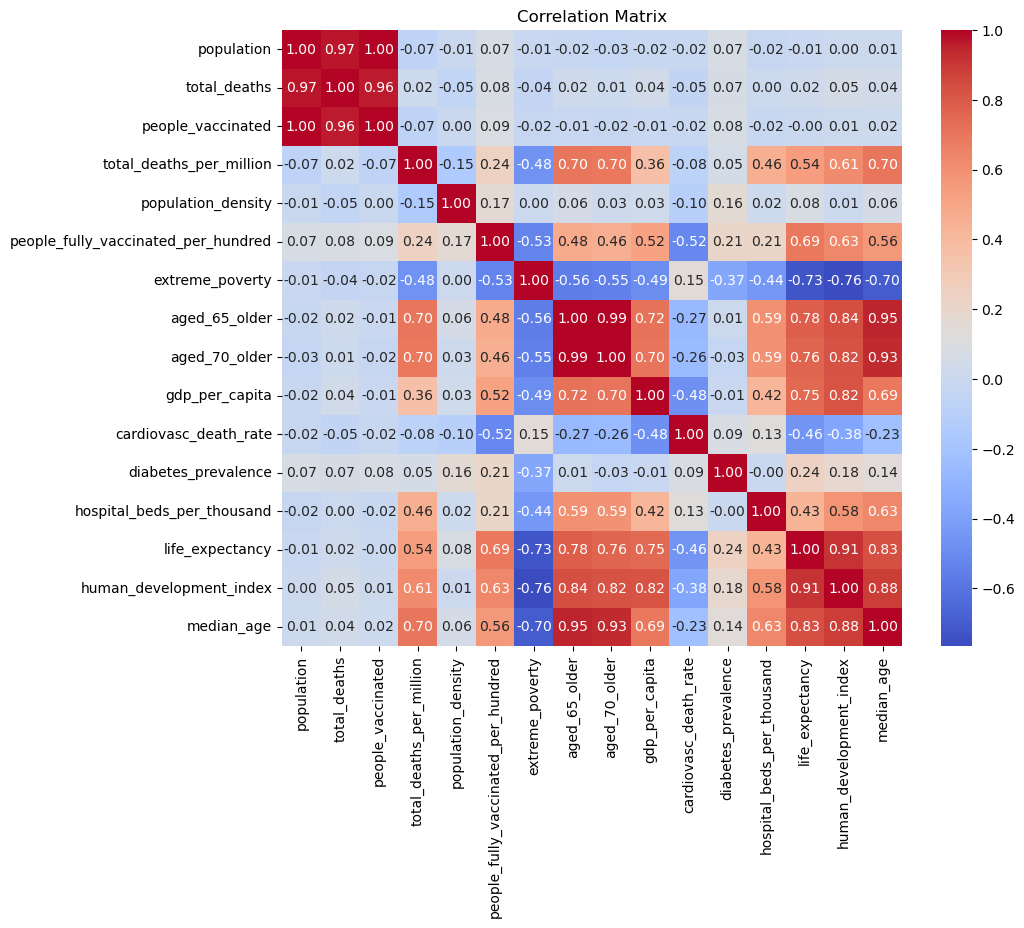

In [21]:
# Continue EDA by looking at by column correlations using a Seaborn heatmap
# Compute the correlation matrix
correlation_matrix = cleaned_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Scattplots and visualizations: Dependent variable on Y axis (Deaths per million), Independent variable on the X axis

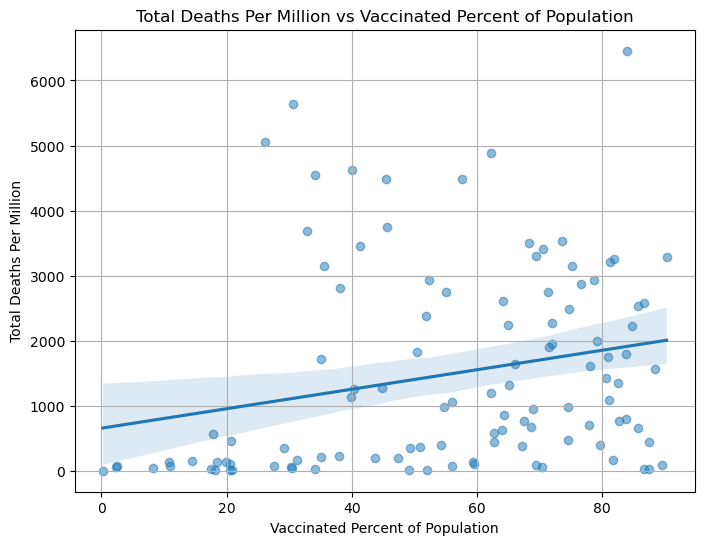

In [28]:
# Looking to examine the relationship between vaccinated percent of population and total deaths in a country

# Create the scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(x='people_fully_vaccinated_per_hundred', y='total_deaths_per_million', data=cleaned_df, scatter_kws={'alpha': 0.5})
plt.title(f'Total Deaths Per Million vs Vaccinated Percent of Population')
plt.xlabel('Vaccinated Percent of Population')
plt.ylabel('Total Deaths Per Million')
plt.grid(True)
plt.show()

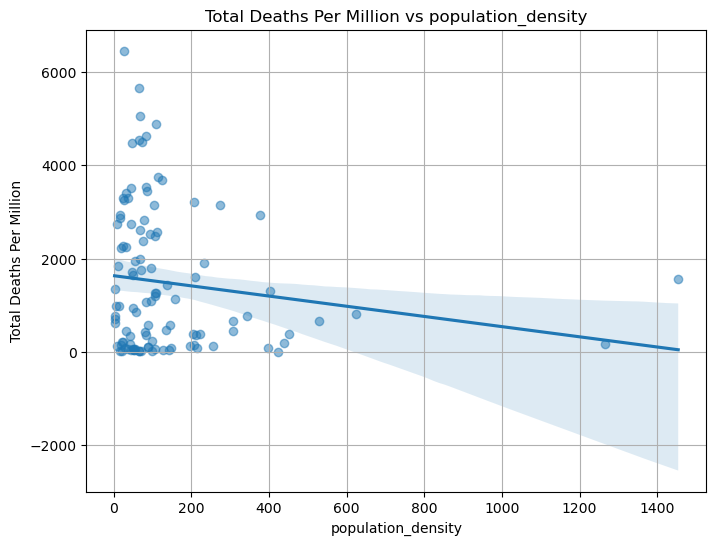

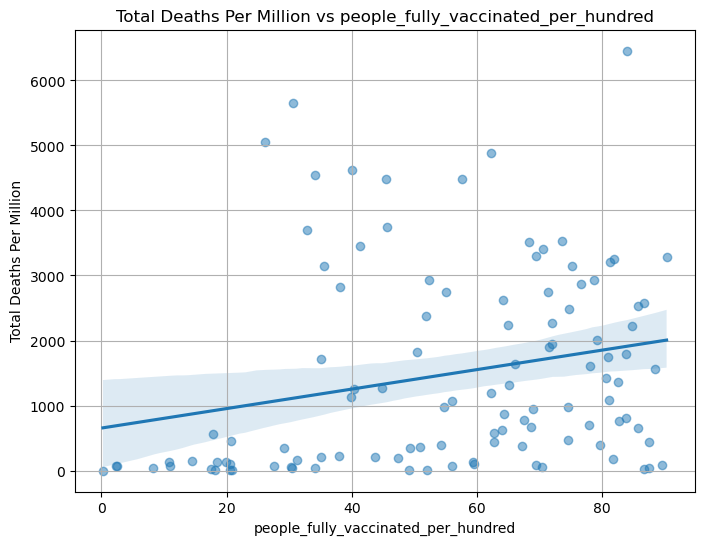

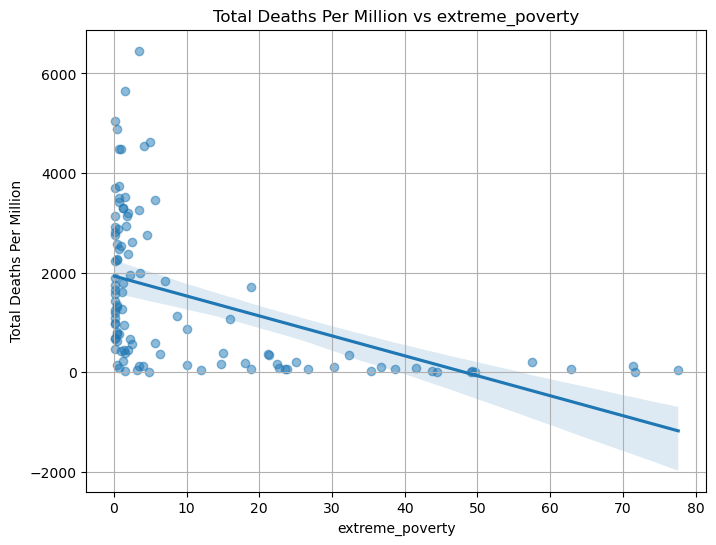

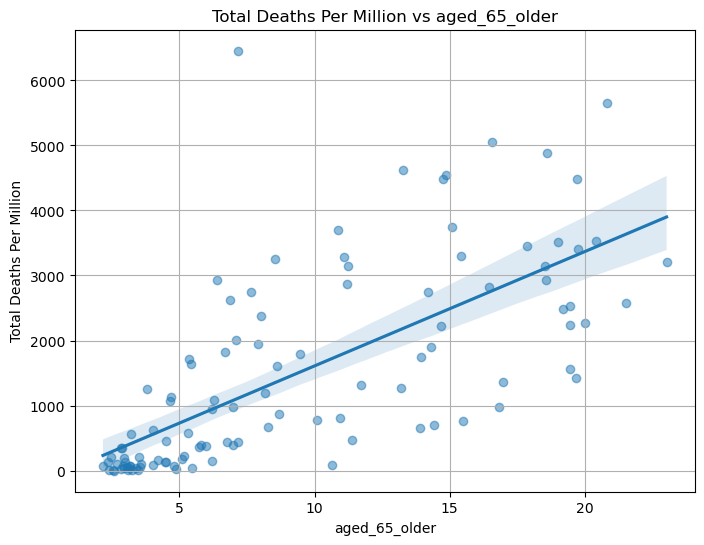

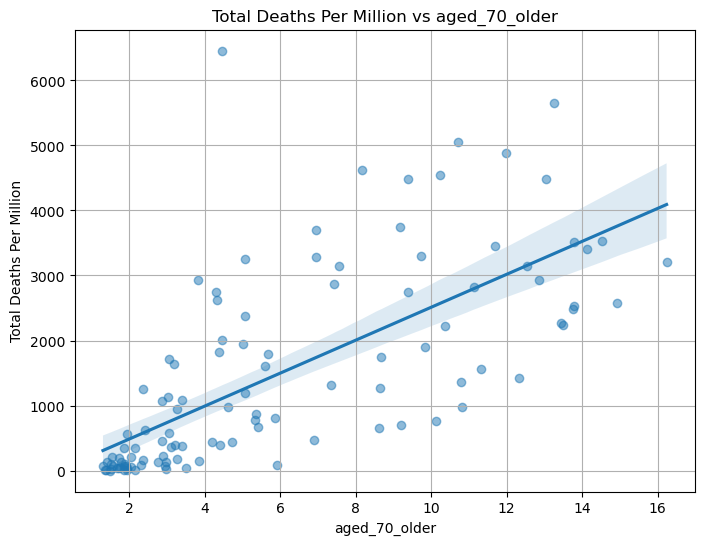

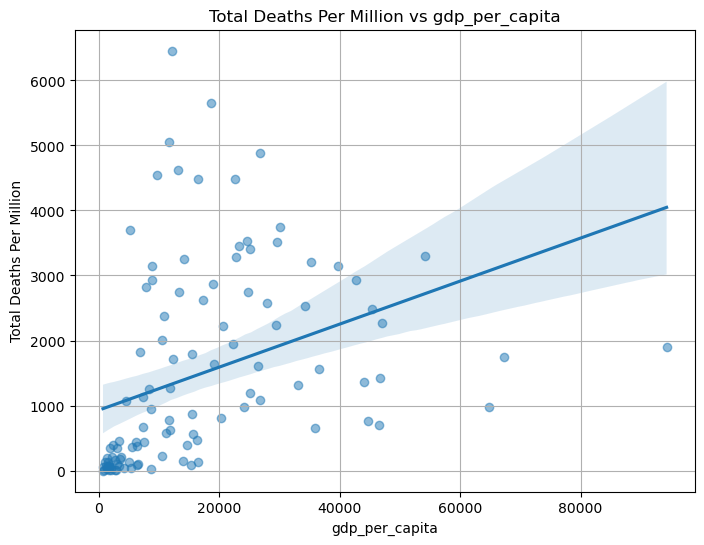

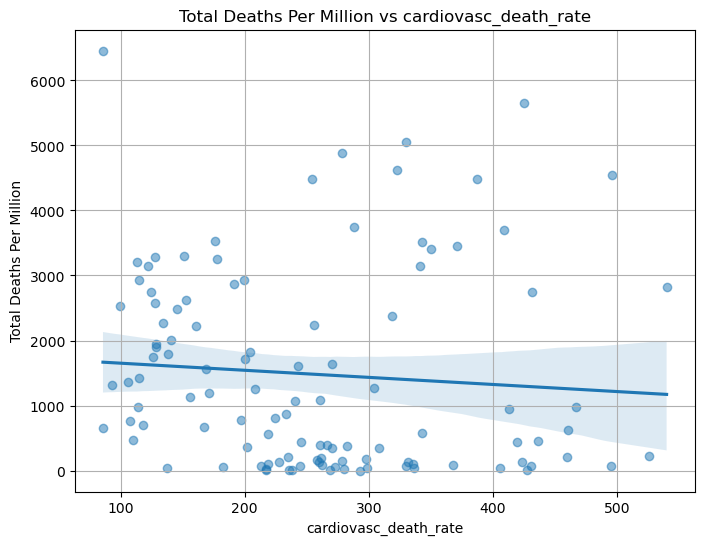

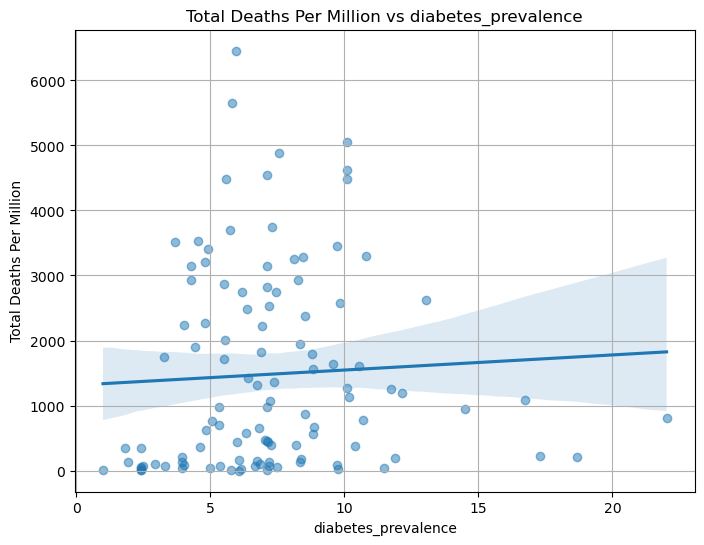

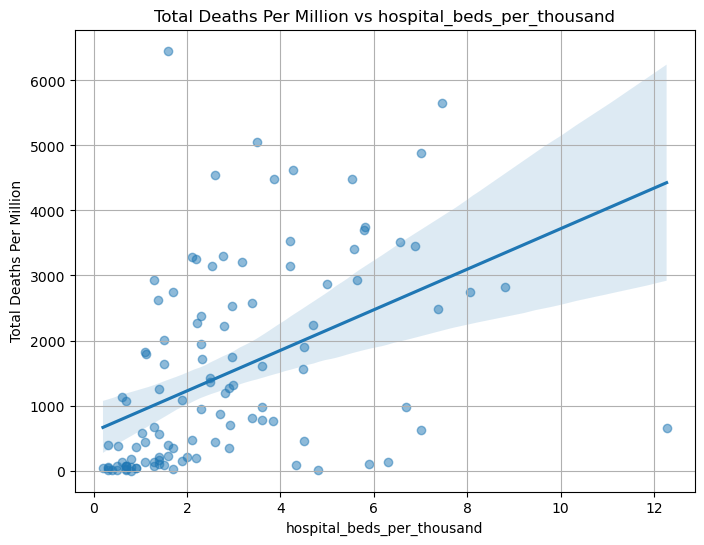

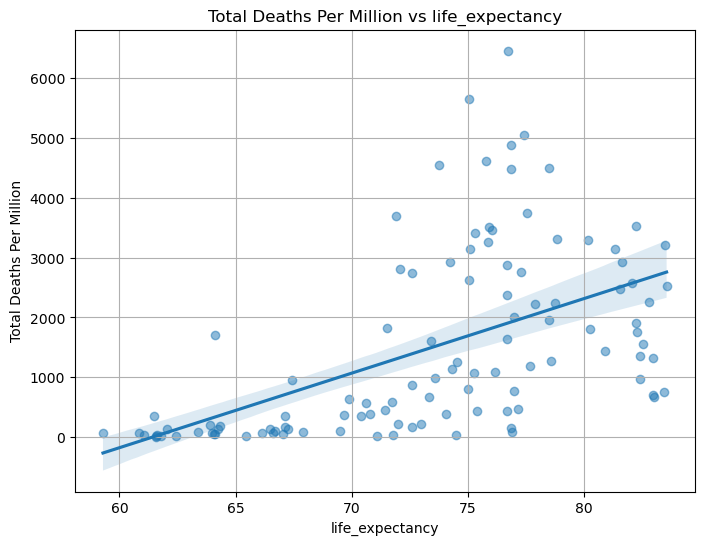

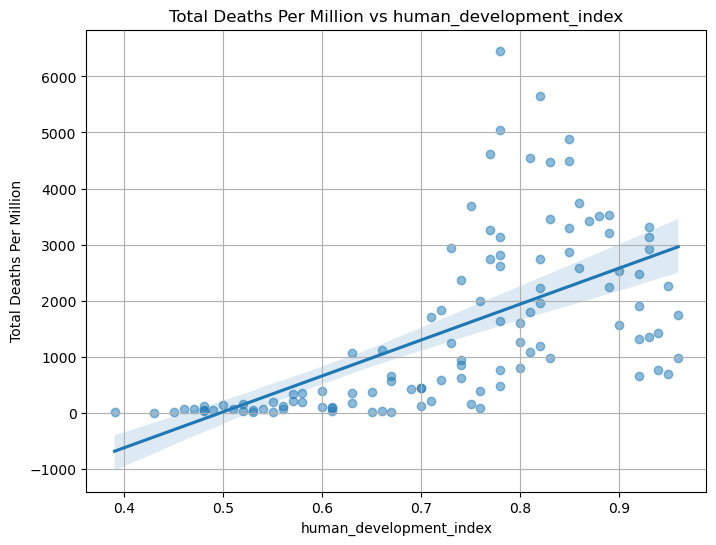

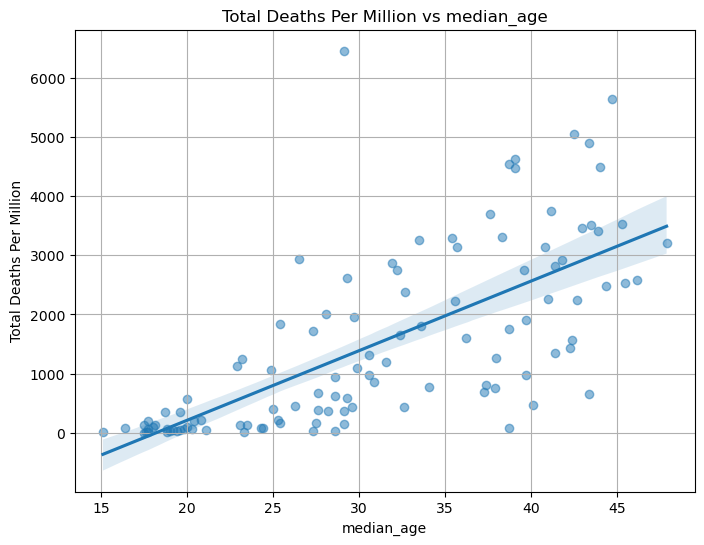

In [24]:
# Create scatter plots with linear regression lines for each column

# List of columns to compare with 'total_deaths_per_million'
columns_to_compare = ['population_density', 'people_fully_vaccinated_per_hundred', 'extreme_poverty', 'aged_65_older', 'aged_70_older',
                      'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                      'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'median_age']

for column in columns_to_compare:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='total_deaths_per_million', data=cleaned_df, scatter_kws={'alpha': 0.5})
    plt.title(f'Total Deaths Per Million vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total Deaths Per Million')
    plt.grid(True)
    plt.show()

In [31]:
# In order to expand the number of entries in a plot I created a new dataframe which
# would include more countries than the cleaned_df, this one 'narrowed' to the
# criteria I wanted to test below:

narrow_df = main_df.groupby('location_x').agg({
    'total_deaths_per_million': max,
    'people_fully_vaccinated_per_hundred': max,
    'extreme_poverty': max,
    'aged_65_older': max,
    'aged_70_older': max,
    'gdp_per_capita': max,
    'life_expectancy': max,
    'human_development_index': max,
    'median_age': max
})

narrow_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_deaths_per_million             237 non-null    float64
 1   people_fully_vaccinated_per_hundred  235 non-null    float64
 2   extreme_poverty                      126 non-null    float64
 3   aged_65_older                        193 non-null    float64
 4   aged_70_older                        199 non-null    float64
 5   gdp_per_capita                       196 non-null    float64
 6   life_expectancy                      234 non-null    float64
 7   human_development_index              190 non-null    float64
 8   median_age                           201 non-null    float64
dtypes: float64(9)
memory usage: 19.9+ KB


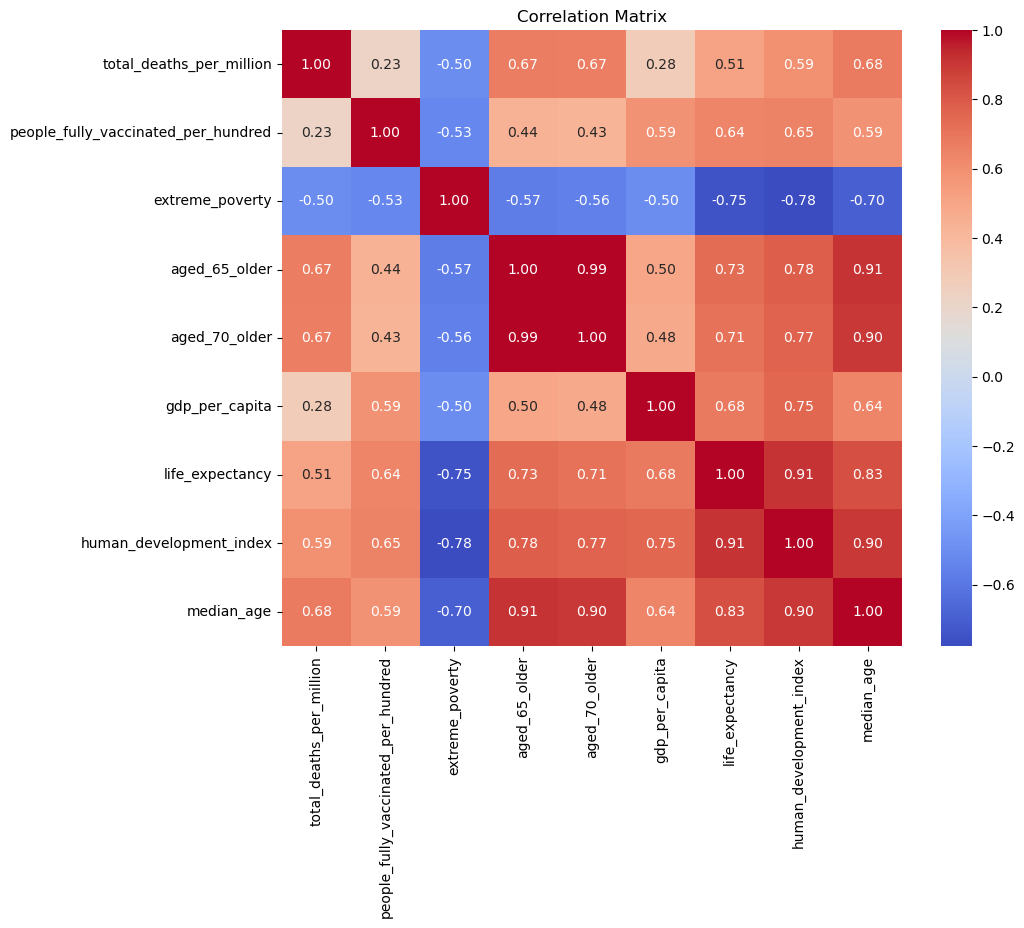

In [32]:
# Compute the correlation matrix
# Looking at the "narrowed" dataframe provides cleaner correlation matrix
# more focused on what I wanted to test
correlation_matrix = narrow_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

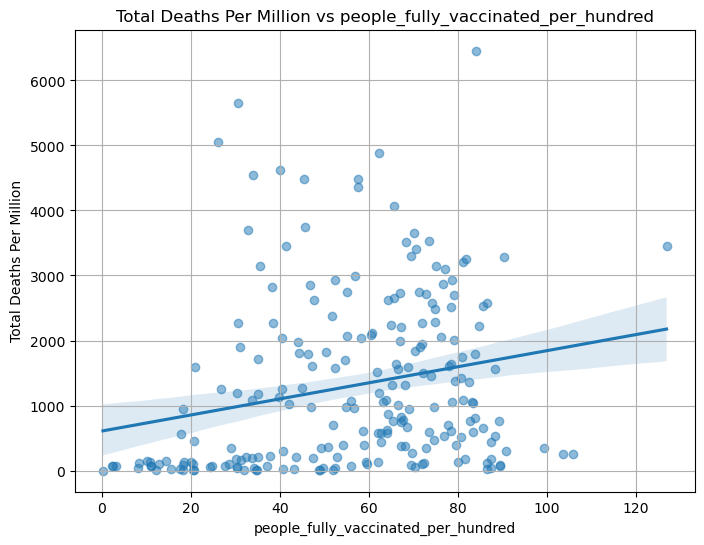

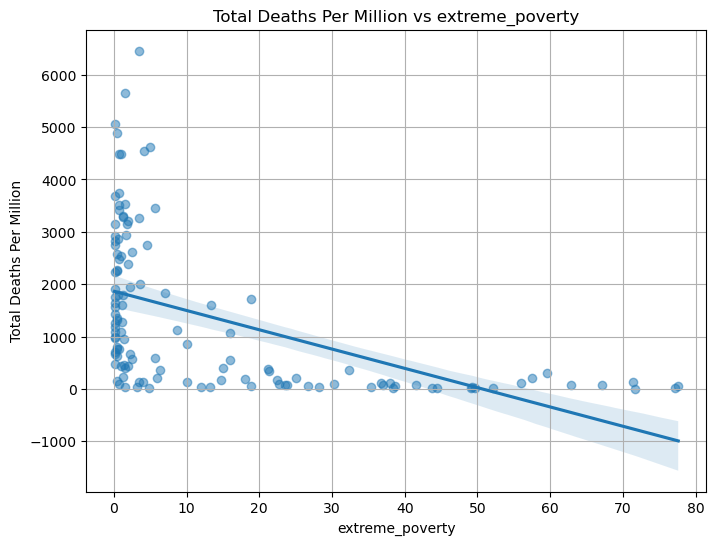

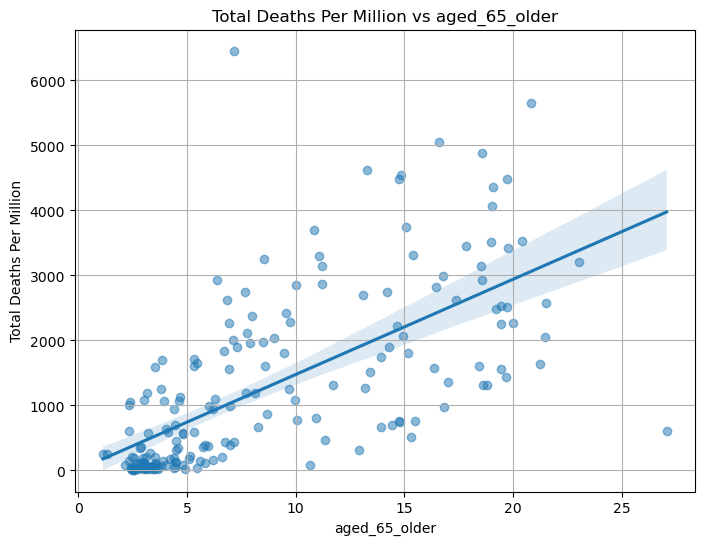

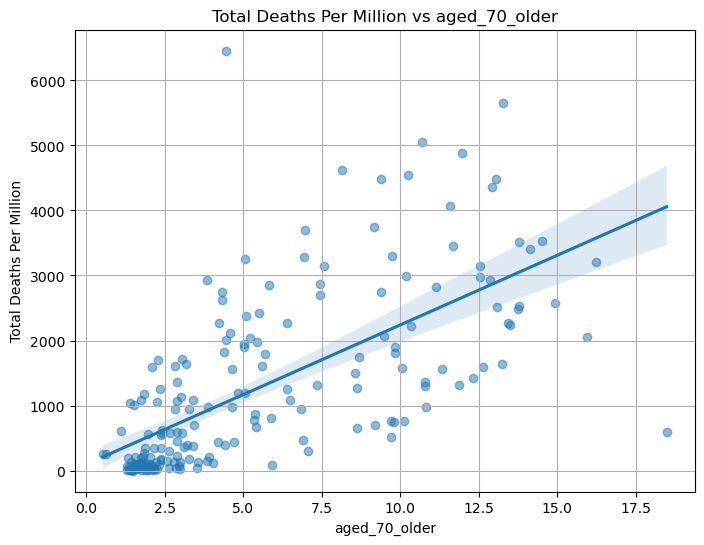

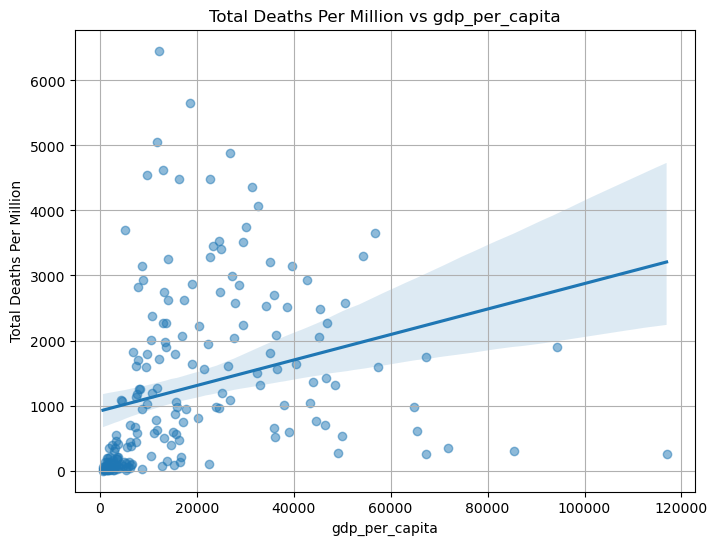

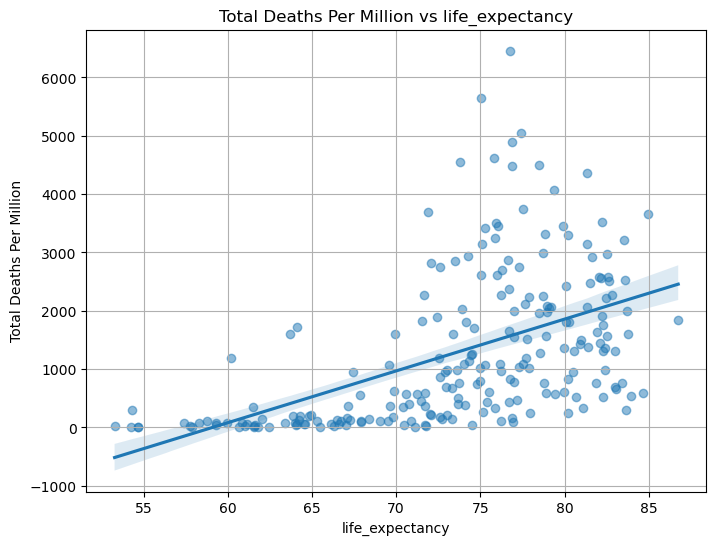

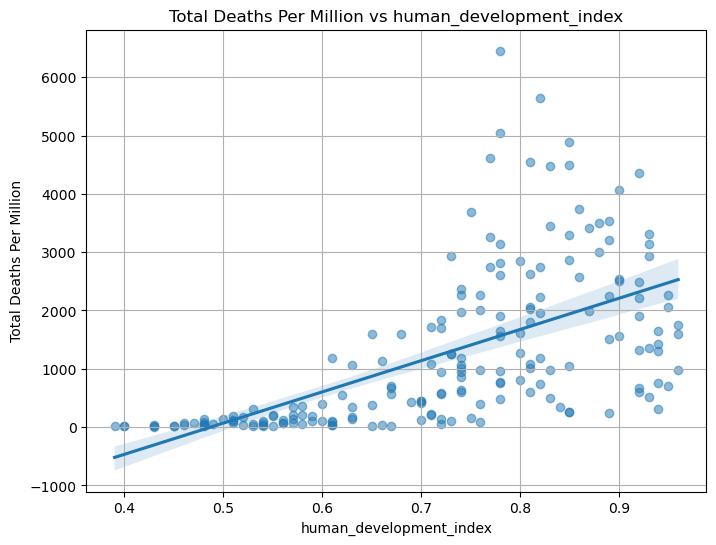

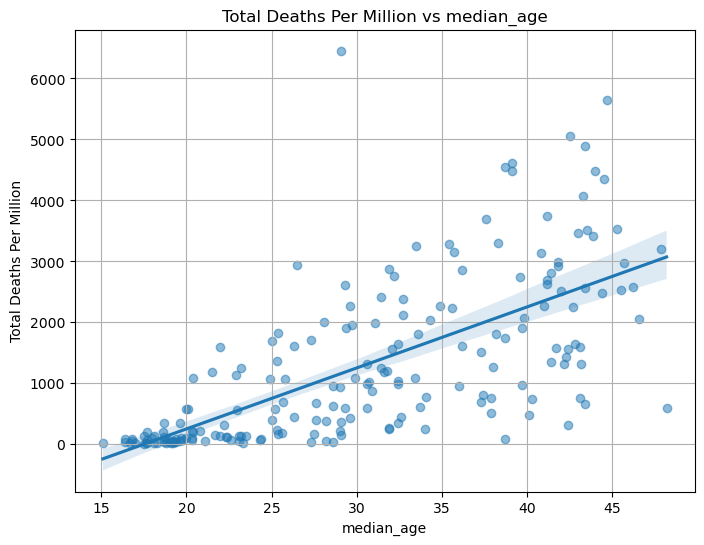

In [77]:
# Create scatter plots with linear regression lines for each column
columns_to_compare_a = ['people_fully_vaccinated_per_hundred', 'extreme_poverty', 'aged_65_older', 'aged_70_older',
                      'gdp_per_capita', 'life_expectancy', 'human_development_index', 'median_age']


for column in columns_to_compare_a:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='total_deaths_per_million', data=narrow_df, scatter_kws={'alpha': 0.5})
    plt.title(f'Total Deaths Per Million vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total Deaths Per Million')
    plt.grid(True)
    plt.show()

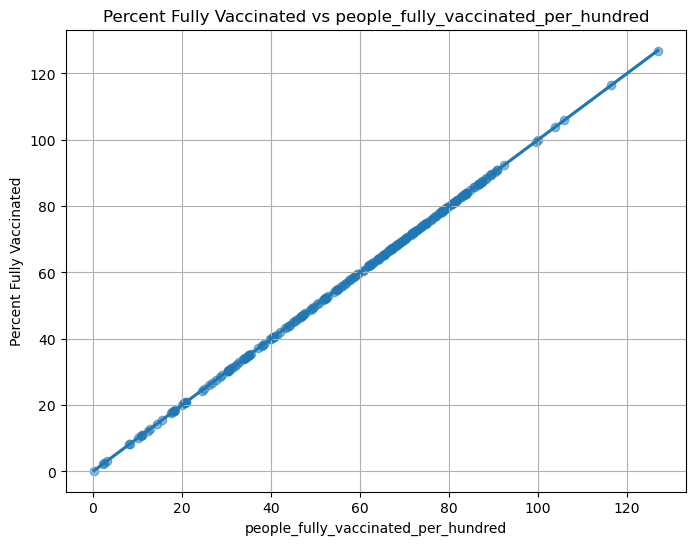

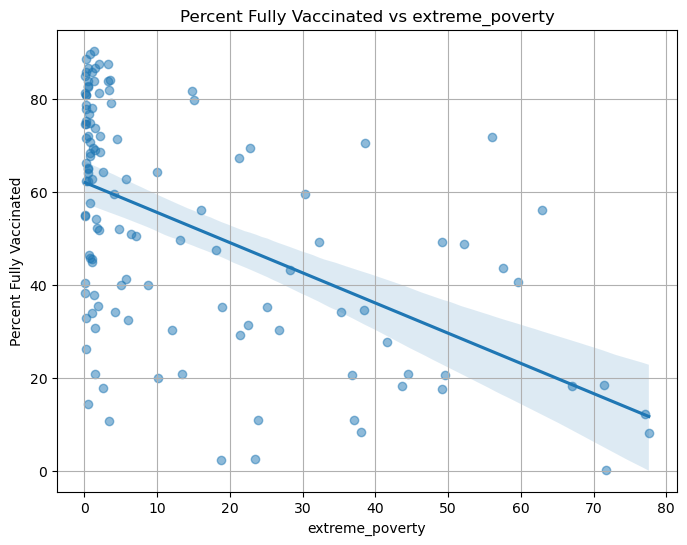

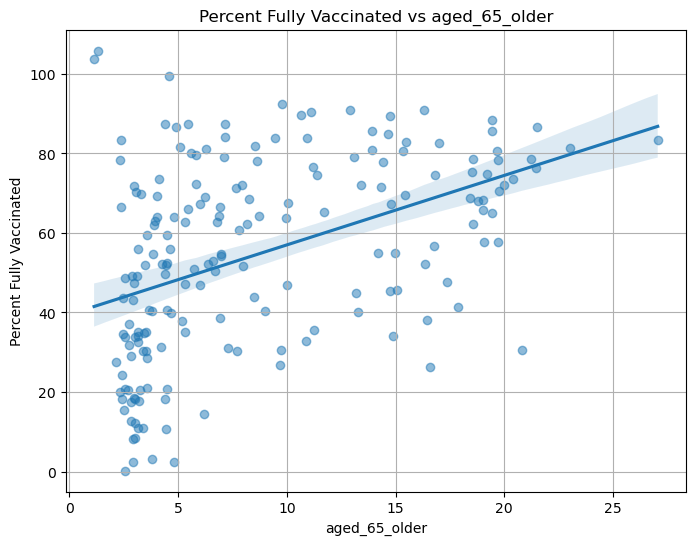

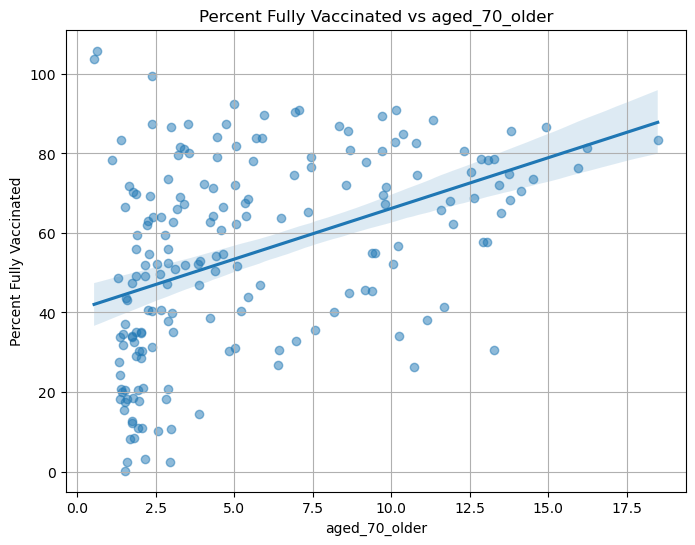

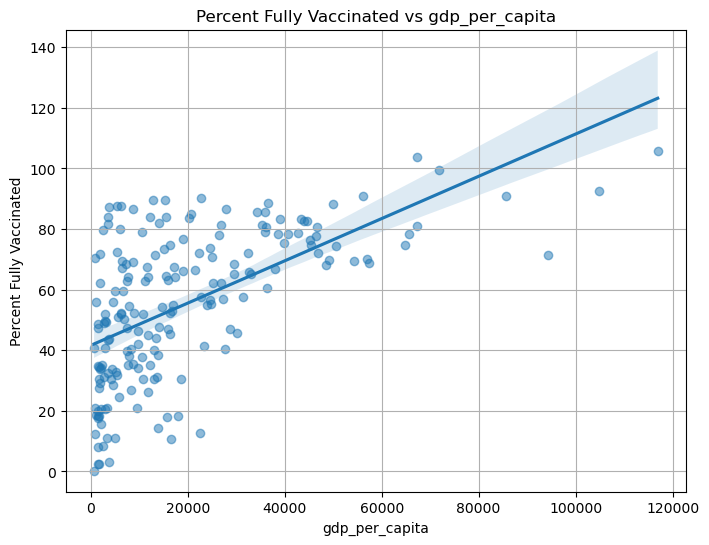

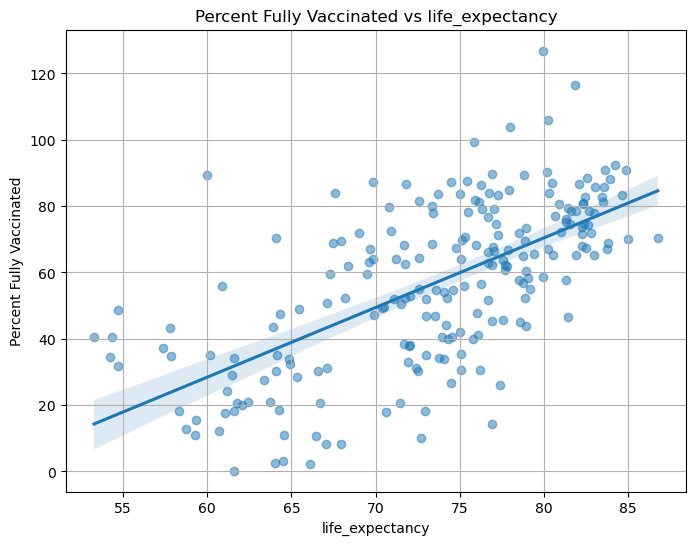

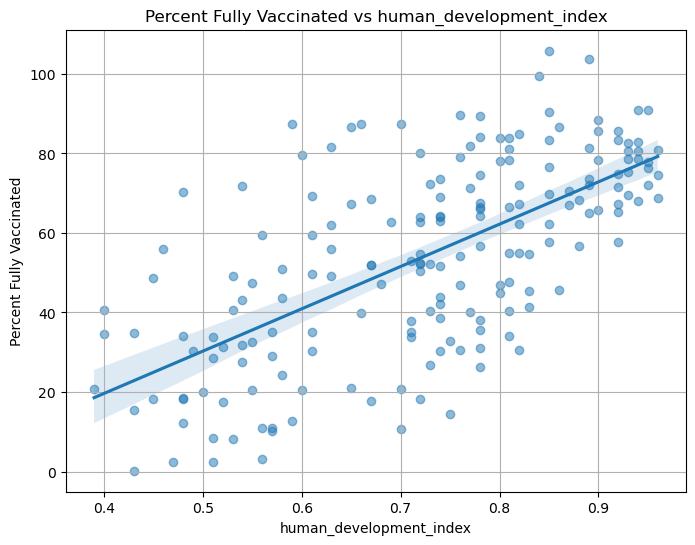

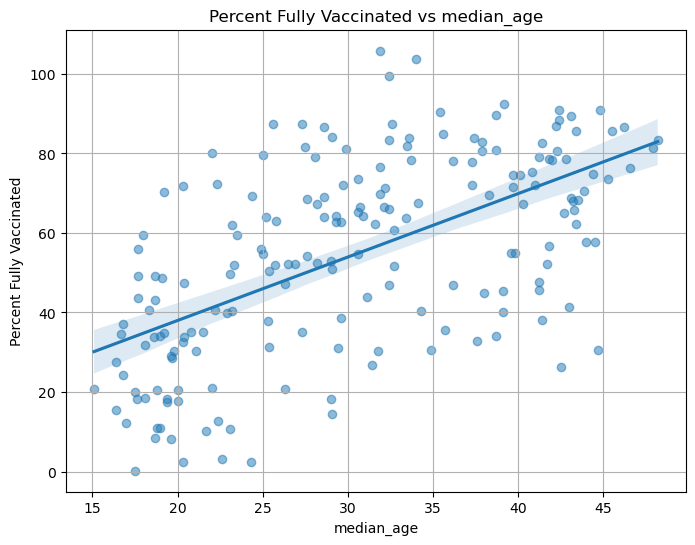

In [34]:
# Create scatter plots with linear regression lines for each column
columns_to_compare_a = ['people_fully_vaccinated_per_hundred', 'extreme_poverty', 'aged_65_older', 'aged_70_older',
                      'gdp_per_capita', 'life_expectancy', 'human_development_index', 'median_age']


for column in columns_to_compare_a:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='people_fully_vaccinated_per_hundred', data=narrow_df, scatter_kws={'alpha': 0.5})
    plt.title(f'Percent Fully Vaccinated vs {column}')
    plt.xlabel(column)
    plt.ylabel('Percent Fully Vaccinated')
    plt.grid(True)
    plt.show()

## Hypothesis Testing

Hypothesis Test

**Null Hypothesis ($H_0$):** Vaccination rates do not lower the death rate in a country.

**Alternative Hypothesis ($H_1$):** An increase in vaccination rates lowers the death rate in a country.

**Significance Level ($\alpha$):** 0.05

In [42]:
# Using a dataframe without nans for testing purposes
testing_df = narrow_df.dropna()

In [43]:
# Single OLS regression test for vaccinated percent v total deaths per million

X = testing_df['people_fully_vaccinated_per_hundred']  # Vaccination rates (predictor)
y = testing_df['total_deaths_per_million']  # Death rates (outcome)

# Add a constant column to X for the intercept term in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.079
Model:                                  OLS   Adj. R-squared:                  0.071
Method:                       Least Squares   F-statistic:                     10.33
Date:                      Mon, 07 Aug 2023   Prob (F-statistic):            0.00167
Time:                              17:40:31   Log-Likelihood:                -1068.0
No. Observations:                       123   AIC:                             2140.
Df Residuals:                           121   BIC:                             2146.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

#### P-value of 0.002 suggests that my test is statistically significant and I can reject my null hypothesis.  However, the view of the linear regression model shows that deaths increase consistent with vaccination rates.  This leads one to believe that there are other factors affecting death rates.

In [44]:
# Assuming narrow_df contains the relevant data
dependent_variable = 'total_deaths_per_million'
independent_variables = ['gdp_per_capita', 'median_age', 'human_development_index', 'life_expectancy', 'aged_65_older', 'extreme_poverty', 'people_fully_vaccinated_per_hundred']

# Add a constant term for the intercept in the regression model
testing_df['constant'] = 1

# Define the dependent variable and independent variables
X = testing_df[['constant'] + independent_variables]
y = testing_df[dependent_variable]

# Perform the multiple linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.616
Model:                                  OLS   Adj. R-squared:                  0.592
Method:                       Least Squares   F-statistic:                     26.32
Date:                      Mon, 07 Aug 2023   Prob (F-statistic):           3.27e-21
Time:                              17:41:03   Log-Likelihood:                -1014.2
No. Observations:                       123   AIC:                             2044.
Df Residuals:                           115   BIC:                             2067.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

C:\Users\trali\AppData\Local\Temp\ipykernel_5988\4049768304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['constant'] = 1


#### Note to self: For the next steps, work on developing the .py file with working code, cleaning up the notebook.  There may be future value in analyzing excess death rates to account for the possibility of underreporting in less developed, poorer, or autocratic societies.  Even assessing discrepancies between reported covid deaths and excess mortality may reveal interesting insights.

#### Note to self: In the two tests above I have used the narrow_df as the basis of my testing instead of the cleaned_df.  This means that I need to update my powerpoint presentation to capture the larger dataset.